# 확률적 경사 하강법

점진적 학습: 기준 훈련 모델을 버리지 않고, 새로운 데이터에 대해서만 조금 씩 더 훈련하는 방법  ->훈련에 사용한 데이터를 모두 유지할 필요 없고 앞서 학습한 데이터를 까먹을 일 없다.

확률적 경사 하강법(Stochastic Grandient Descent)->대표적 점진적 학습 알고리즘

* 확률적 경사 하강법: 훈련 세트에서 하나의 샘플을 고르는 것, 배치 경사 하강법의 다른 대안으로 인기가 높다, 반복 또는 온라인 경사 하강법, 다음 첫 번째 수식처럼 모든 샘플에 대하여 누적된 오차의 합을 기반으로 가중치를 업데이트하는 대신 각 훈련 샘플에 대해서 조금씩 가중치를 업데이트한다.
* epoch(에폭): 확률적 경사 하강법에서 훈련 세트를 한 번 모두 사용하는것
* 미니배치 경사 하강법(minibatch gradient descent) 여러개의 샘플을 사용해 경사 하강법을 수행하는 방식
* 배치 경사 하강법(batch gradient descent): 한 번 경사로를 따라 이동하기 위해 전체 샘플을 사용하는 방식
* 손실 함수(loss function): 어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지 측정하는 기준(값이 작을 수록 좋다) 샘플 하나에 대한 손실을 정의
* 비용 함수(cost function): 훈련 세트에 있는 모든 샘플에 대한 손실 함수의 합. 보통 손실함수와 구분하지 않고 사용한다.
* 로지스틱 손실 함수(이진 크로스엔트로피 손실함수): 양성 클래스(타깃=1)일 때 손실을 -log(예측 확률)로 계산하고 음성 클래스(타깃=0)일 때 손실을 -log(1-예측 확률)로 계산
* 크로스엔트로피 손실함수: 다중 분류에서 사용하는 손실 함수

In [5]:
import pandas as pd
fish= pd.read_csv('http://bit.ly/fish_csv')

In [10]:
fish_input=fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

In [11]:
fish_target=fish['Species'].to_numpy()

In [13]:
from sklearn.model_selection import train_test_split
train_input, test_input,train_target,test_target=train_test_split(fish_input,fish_target,random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_input)
train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)

In [18]:
from sklearn.linear_model import SGDClassifier

In [20]:
sc=SGDClassifier(loss='log',max_iter=10,random_state=42)

In [21]:
sc.fit(train_scaled,train_target)

C:\Users\seonwoo\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDClassifier(loss='log', max_iter=10, random_state=42)

In [22]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled,test_target))

0.773109243697479
0.775


In [23]:
sc.partial_fit(train_scaled,train_target)

SGDClassifier(loss='log', max_iter=10, random_state=42)

In [24]:
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.8151260504201681
0.825


# epoch과 과대/과소 적합
epoch횟수가 적을 경우: 훈련 세트를 덜 학습한다. 따라서 과소적합될 가능성이 높다.
    
epoch횟수가 많을 경우: 훈련 세트를 완전히 학습한다. 따라서 과대적합될 가능성이 높다

조기 종료: 과대적합이 시작하기 전에 훈련을 멈추는 것

In [27]:
import numpy as np
sc=SGDClassifier(loss='log',random_state=42)
train_score=[]
test_score=[]
classes=np.unique(train_target)

In [28]:
for _ in range(0,300):
    sc.partial_fit(train_scaled,train_target,classes=classes)
    train_score.append(sc.score(train_scaled,train_target))
    test_score.append(sc.score(test_scaled,test_target))

In [29]:
import matplotlib.pyplot as plt

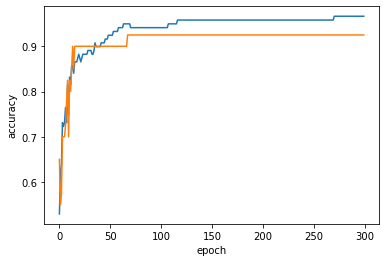

In [31]:
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [32]:
sc=SGDClassifier(loss='log',max_iter=100,tol=None,random_state=42)
sc.fit(train_scaled,train_target)

SGDClassifier(loss='log', max_iter=100, random_state=42, tol=None)

In [33]:
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.957983193277311
0.925


# 결정트리

In [34]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine-date')

In [36]:
wine.head()

alcohol  sugar    pH  class
0      9.4    1.9  3.51    0.0
1      9.8    2.6  3.20    0.0
2      9.8    2.3  3.26    0.0
3      9.8    1.9  3.16    0.0
4      9.4    1.9  3.51    0.0

In [42]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [38]:
data=wine[['alcohol','sugar','pH']].to_numpy()

In [39]:
target=wine['class'].to_numpy()

In [40]:
train_input,test_input,train_target,test_target=train_test_split(data,target,test_size=0.2,random_state=42)

In [41]:
train_input.shape,test_input.shape

((5197, 3), (1300, 3))

In [43]:
ss=StandardScaler()

In [44]:
ss.fit(train_input)

StandardScaler()

In [45]:
train_scaled=ss.transform(train_input)

In [46]:
test_scaled=ss.transform(test_input)

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
lr=LogisticRegression()

In [50]:
lr.fit(train_scaled,train_target)

LogisticRegression()

In [51]:
print(lr.score(train_scaled,train_target))

0.7808350971714451


In [52]:
print(lr.score(test_scaled,test_target))

0.7776923076923077


In [54]:
print(lr.coef_,lr.intercept_)# 기울기 ,절편

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


In [59]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
df=DecisionTreeClassifier()

In [88]:
df.fit(train_scaled,train_target)

DecisionTreeClassifier()

In [89]:
print(df.score(train_scaled,train_target))

0.996921300750433


In [90]:
print(df.score(test_scaled,test_target))

0.8576923076923076


In [91]:
from sklearn.tree import plot_tree

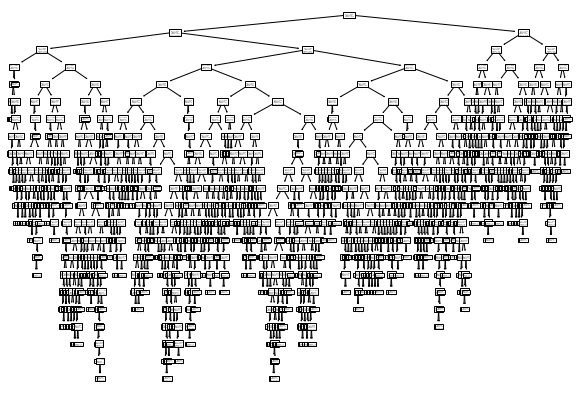

In [93]:
plt.figure(figsize=(10,7))
plot_tree(df)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

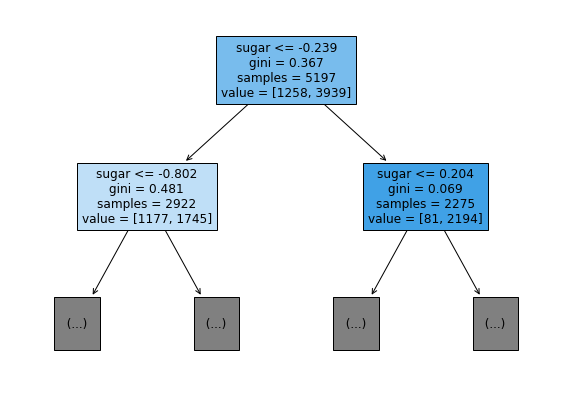

In [94]:
plt.figure(figsize=(10,7))
plot_tree(df,max_depth=1, filled=True,feature_names=['alcohol','sugar','pH'])
plt.show

In [72]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


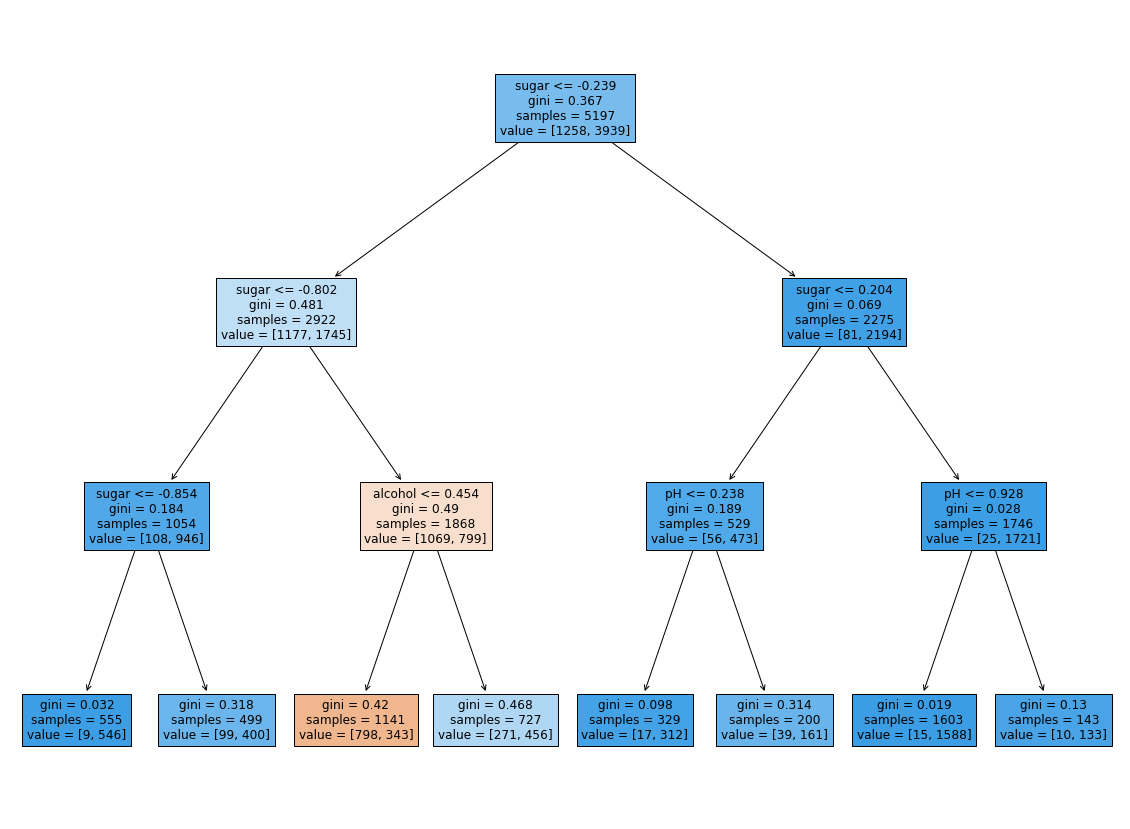

In [73]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [74]:

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


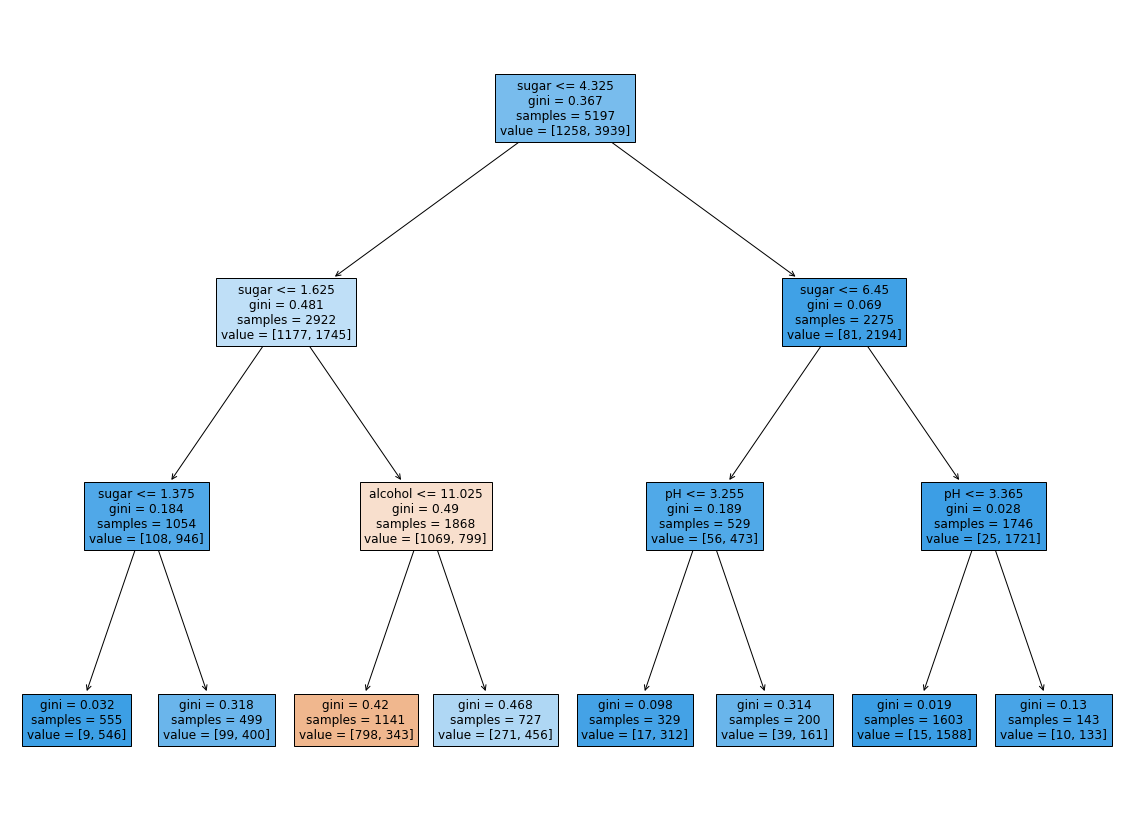

In [75]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()